In [6]:
from google.colab import files
uploaded = files.upload()

Saving LanguageIdentifiedComments.csv to LanguageIdentifiedComments.csv


In [7]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['LanguageIdentifiedComments.csv']))

In [8]:
data.describe()

,2
count,78793.000000
mean,1.365850
std,1.605257
min,0.064461
25%,0.987343
50%,0.999913
75%,1.000046
max,13.675113


In [9]:
data.head()

,0,1,2,3
0,https://youtu.be/ffJUoaH-7xc,other,0.873828,IndicLID-FTR
1,"Delhi,s pollution is due to physics phenomena ...",eng_Latn,0.999511,IndicLID-FTR
2,U are u evil and nasty Cm god is watching u al...,eng_Latn,1.000049,IndicLID-FTR
3,BJP spoke person is a child why are these news...,eng_Latn,1.000047,IndicLID-FTR
4,This is not only the Delhi issue but many othe...,eng_Latn,1.000046,IndicLID-FTR


In [10]:
column_names = ['Comment', 'IndicLID Code', 'Score','Model']
data.columns = column_names
data.head(15)

,Comment,IndicLID Code,Score,Model
0,https://youtu.be/ffJUoaH-7xc,other,0.873828,IndicLID-FTR
1,"Delhi,s pollution is due to physics phenomena ...",eng_Latn,0.999511,IndicLID-FTR
2,U are u evil and nasty Cm god is watching u al...,eng_Latn,1.000049,IndicLID-FTR
3,BJP spoke person is a child why are these news...,eng_Latn,1.000047,IndicLID-FTR
4,This is not only the Delhi issue but many othe...,eng_Latn,1.000046,IndicLID-FTR
5,Power our election coverage: https://www.newsl...,other,0.888931,IndicLID-FTR
6,Dewali mein crackers to yahe jalate hai,hin_Latn,5.978193,IndicLID-BERT
7,The safe level of pm2.5 is 15ug/m3. Most of th...,eng_Latn,1.000040,IndicLID-FTR
8,Yehi hotha hey UNBIASED Reporting...🤓Abh dekho...,asm_Latn,0.771868,IndicLID-FTR
9,Allah से दुआ है की news लॉन्ड्री के group को ब...,hin_Deva,0.995479,IndicLID-FTN


In [11]:
null_counts = data.isnull().sum()
print(null_counts)

Comment           20
IndicLID Code    116
Score            116
Model            116
dtype: int64


In [12]:
column_names= ['Comment', 'IndicLID Code']
data = data.dropna(subset=column_names, how='any')

In [13]:
null_counts = data.isnull().sum()
print(null_counts)

Comment          0
IndicLID Code    0
Score            0
Model            0
dtype: int64


In [14]:
data['IndicLID Code'].value_counts()

IndicLID Code
eng_Latn     62917
other         3412
kok_Latn      1364
mni_Latn      1161
hin_Deva       931
asm_Latn       919
kas_Latn       890
ben_Latn       709
pan_Latn       671
hin_Latn       661
snd_Latn       531
urd_Latn       512
brx_Latn       491
mai_Deva       402
ori_Latn       396
mni_Meti       382
mai_Latn       312
mal_Latn       293
san_Latn       273
kan_Latn       258
nep_Latn       223
tel_Latn       191
guj_Latn       140
sat_Olch        98
tam_Latn        90
mar_Latn        78
ben_Beng        71
snd_Arab        67
mal_Mlym        55
kas_Deva        47
kok_Deva        27
mar_Deva        25
urd_Arab        25
ori_Orya        24
nep_Deva        24
san_Deva        19
asm_Beng        16
mni_Beng        15
pan_Guru        14
doi_Deva        12
tam_Tamil       11
tel_Telu        10
kan_Knda         9
guj_Gujr         9
brx_Deva         4
kas_Arab         3
Name: count, dtype: int64

Bar plot of Language Distribution

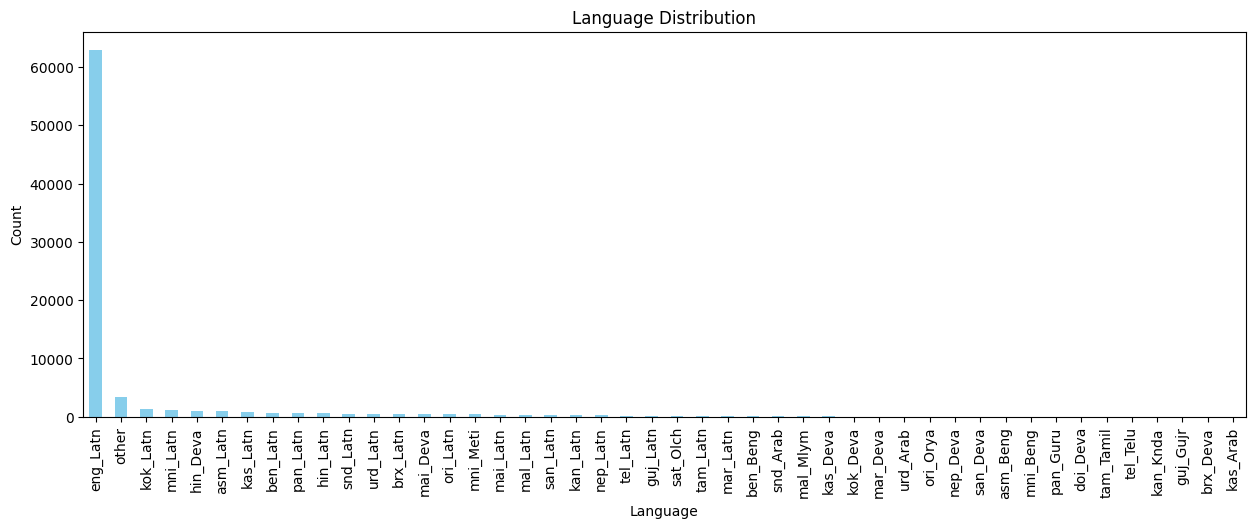

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each language
language_counts = data['IndicLID Code'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 5))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [18]:
comments = pd.DataFrame(data['Comment'])

In [19]:
comments.describe()

,Comment
count,78792
unique,78787
top,...
freq,2


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    if pd.notna(text):
        text = text.lower()
        text = re.sub(r'https?://\S+', '', text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word.isalnum()]
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        preprocessed_text = ' '.join(tokens)
    else:
        preprocessed_text = ''
    return preprocessed_text

preprocessedComments = pd.DataFrame()
preprocessedComments['comments'] = comments['Comment'].apply(preprocess_text)
print(preprocessedComments)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                comments
0                                                       
1      delhi pollution due physic phenomenon atmosphe...
2      u u evil nasty cm god watching u wrong u peopl...
3      bjp spoke person child news channel considerin...
4      delhi issue many state also dealing high pollu...
...                                                  ...
78904  cracker kyun ban kar rahe ho jab pata nahi ki ...
78905                aaptard currupt opportunistic party
78906                        aur ye education minister h
78907                                                   
78908  ye aapiye toh congressi yun ko bhi peeche chor...

[78792 rows x 1 columns]


In [22]:
preprocessedComments.head()

,comments
0,
1,delhi pollution due physic phenomenon atmosphe...
2,u u evil nasty cm god watching u wrong u peopl...
3,bjp spoke person child news channel considerin...
4,delhi issue many state also dealing high pollu...


Word Cloud

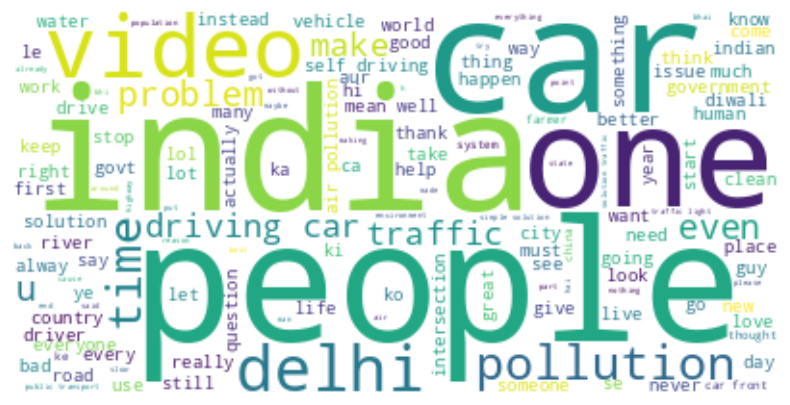

In [30]:
from wordcloud import WordCloud

text = " ".join(comment for comment in preprocessedComments['comments'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [31]:
print(wordcloud.words_.keys())

dict_keys(['india', 'people', 'car', 'one', 'video', 'delhi', 'pollution', 'time', 'problem', 'u', 'even', 'make', 'traffic', 'driving car', 'self driving', 'think', 'need', 'indian', 'country', 'road', 'know', 'see', 'solution', 'way', 'thing', 'government', 'human', 'good', 'driver', 'go', 'alway', 'still', 'work', 'everyone', 'say', 'stop', 'ye', 'city', 'well', 'much', 'world', 'use', 'river', 'right', 'really', 'come', 'take', 'going', 'ki', 'vehicle', 'drive', 'want', 'water', 'guy', 'new', 'look', 'better', 'year', 'never', 'question', 'life', 'keep', 'thank', 'many', 'let', 'bad', 'mean', 'ka', 'air pollution', 'le', 'love', 'something', 'lol', 'day', 'instead', 'happen', 'start', 'intersection', 'give', 'se', 'actually', 'ko', 'issue', 'govt', 'aur', 'diwali', 'lot', 'ca', 'place', 'hi', 'every', 'help', 'live', 'someone', 'clean', 'must', 'first', 'great', 'thought', 'farmer', 'car front', 'ke', 'china', 'system', 'public transport', 'simple solution', 'please', 'h', 'hai', '

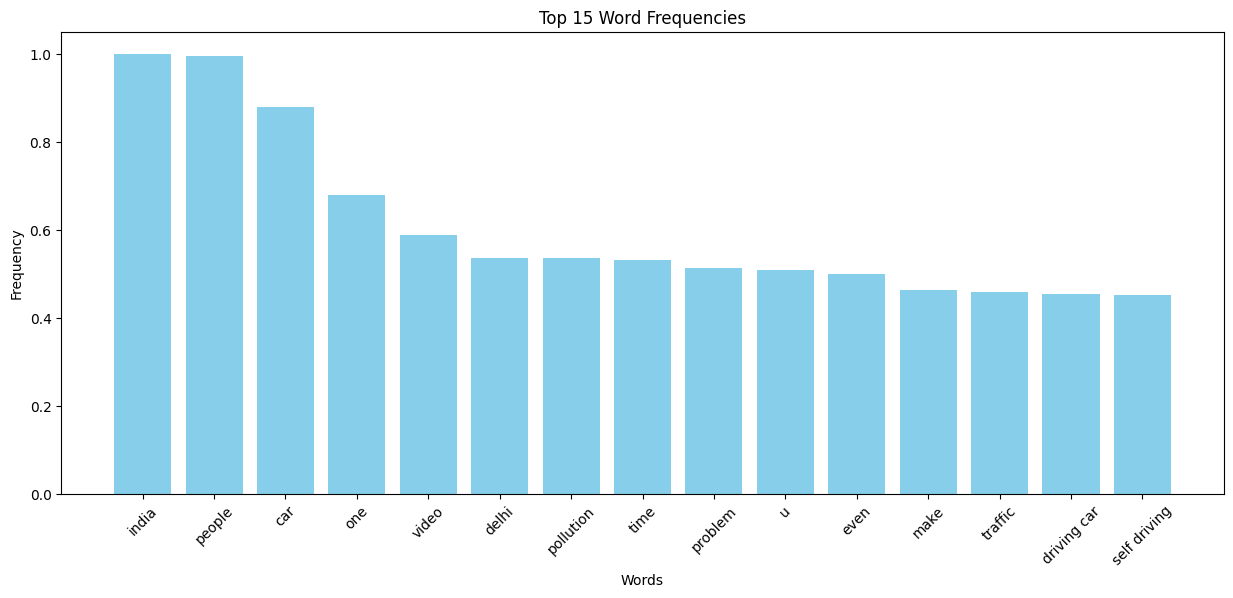

In [37]:
from collections import Counter

frequency = wordcloud.words_

sortedFrequency = dict(sorted(frequency.items(), key=lambda x: x[1], reverse=True))


topWords = list(sortedFrequency.keys())[:15]
topFreq = [sortedFrequency[word] for word in topWords]

plt.figure(figsize=(15, 6))
plt.bar(topWords, topFreq, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Word Frequencies')
plt.xticks(rotation=45)
plt.show()


